<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/regularization/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_diabetes
data= load_diabetes()

In [ ]:
data.keys()
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [ ]:
df1=pd.DataFrame(data.data,columns=data.feature_names)
df1.head()
x=df1.values
y=data.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error

print("mse", mean_squared_error(y_test, y_pred))
print("r2", r2_score(y_test, y_pred))
print("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))


mse 2900.193628493482
r2 0.4526027629719195
rmse 53.85344583676593


In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train, y_train)
y_pred1=ridge.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print("mse", mean_squared_error(y_test, y_pred1))
print("r2", r2_score(y_test, y_pred1))
print("rmse", np.sqrt(mean_squared_error(y_test, y_pred1)))



mse 3077.41593882723
r2 0.41915292635986545
rmse 55.47446204180109


In [ ]:
m= 100
x1= 5*np.random.rand(m,1) - 2
y1= 0.7*x1**2 - 2*x1 + 3+ np.random.randn(m,1)

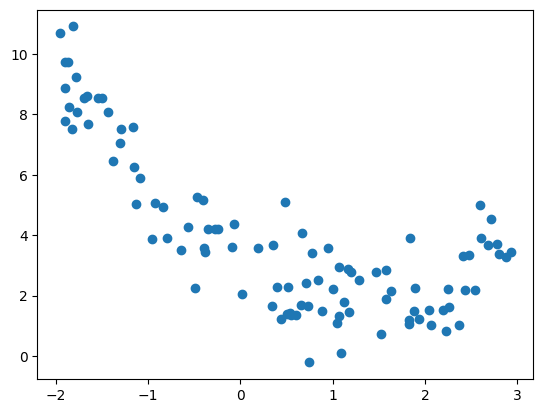

In [ ]:
plt.scatter(x1,y1)

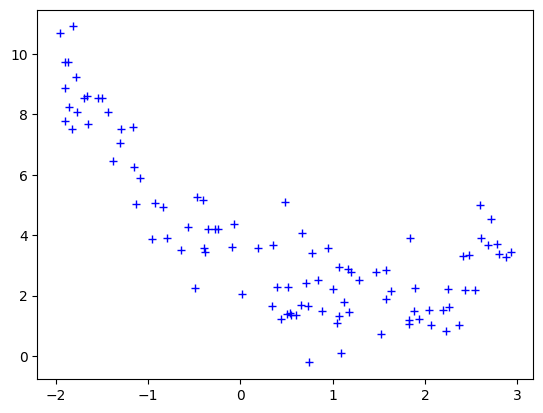

In [ ]:
plt.plot(x1, y1, 'b+', label='Datapoints')

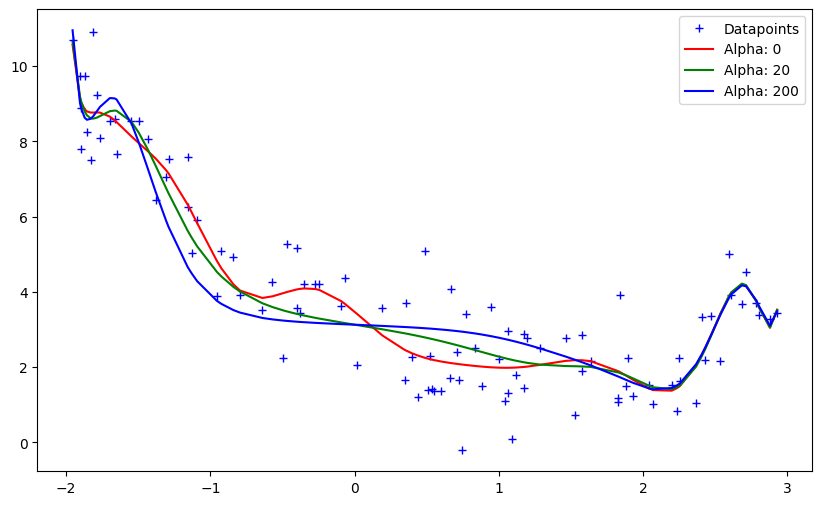

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1,y1 ,alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

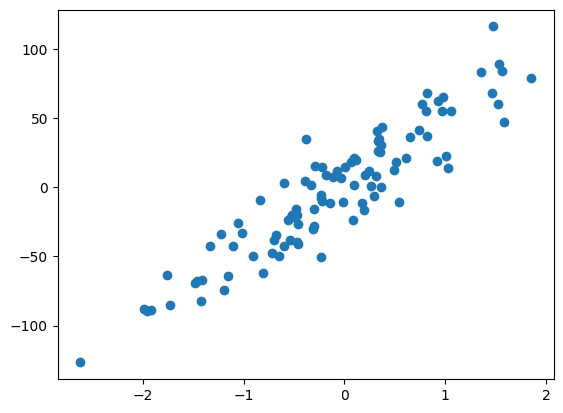

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
lr=LinearRegression()
lr.fit(x,y)
ridge1=Ridge(alpha=0)
ridge1.fit(x,y)
ridge2=Ridge(alpha=10)
ridge2.fit(x,y)
ridge3=Ridge(alpha=100)
ridge3.fit(x,y)
print(lr.coef_, lr.intercept_)
print(ridge1.coef_, ridge1.intercept_)
print(ridge2.coef_, ridge2.intercept_)
print(ridge3.coef_, ridge3.intercept_)

print(lr.score(x,y), ridge1.score(x,y), ridge2.score(x,y), ridge3.score(x,y))

[47.13323967] 2.3302306410539453
[47.13323967] 2.330230641053946
[41.9906212] 1.7961876226164746
[21.18627364] -0.3642714175995887
0.853154207317982 0.853154207317982 0.8429977659891696 0.5946032680938578


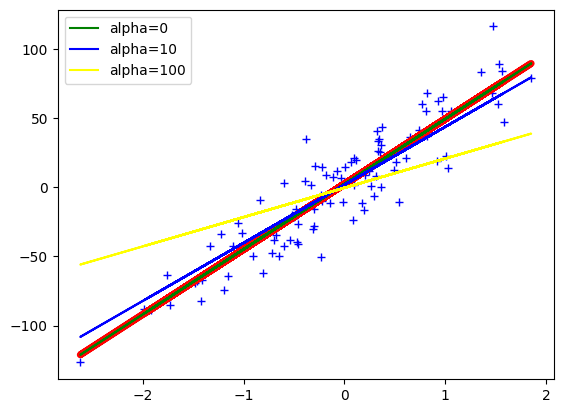

In [ ]:
plt.plot(x,y, "b+")
plt.plot(x, lr.predict(x), color='red', lw=5)
plt.plot(x, ridge1.predict(x), color='green', label="alpha=0")
plt.plot(x, ridge2.predict(x), color='blue', label="alpha=10")
plt.plot(x, ridge3.predict(x), color='yellow', label="alpha=100")
plt.legend()
plt.show()

In [ ]:
#mera ridge
class meraridge:
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.m= None
    self.b= None

  def fit(self,x,y):
    n= len(x)
    x_mean= np.mean(x)
    y_mean= np.mean(y)
    num= 0
    den= 0
    for i in range(n):
      num += (x[i]-x_mean)*(y[i]-y_mean)
      den += (x[i]-x_mean)**2
    self.m= num/(den+self.alpha)
    self.b= y_mean-(self.m*x_mean)
    print(self.m, self.b)


  def predict(self,x):
    return self.m*x+self.b

In [ ]:
mr=meraridge(alpha=100)
mr.fit(x,y)


[21.18627364] [-0.36427142]


In [ ]:
x= data.data
y= data.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha= 0.1, solver= 'cholesky')
ridge.fit(x_train, y_train)
y_pred1=ridge.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error

print( ridge.intercept_, ridge.coef_)
print("rmse", np.sqrt(mean_squared_error(y_test, y_pred1)))

151.45857456679613 [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
rmse 53.446111997699646


In [ ]:
class multipleridge:
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.m= None
    self.b= None

  def fit(self,x_train,y_train):
    x_train= np.insert(x_train, 0,1,  axis=1)
    I= np.identity(x_train.shape[1])
    I[0][0]= 0  #W0 with no coeff
    result= np.linalg.inv(np.dot(x_train.T,x_train) + self.alpha*I).dot(x_train.T).dot(y_train)
    self.m= result[1:]
    self.b= result[0]
    print(self.m, self.b)

  def predict(self,x_test):
    return np.dot(x_test, self.m) + self.b


In [ ]:
mri= multipleridge(alpha=0.1)
mri.fit(x_train, y_train)
mri.predict(x_test)
print(r2_score(y_test, mri.predict(x_test)))

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ] 151.45857456679605
0.4608521946411924


Gradient descent

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor(penalty= "l2", max_iter=1000, eta0=0.1, learning_rate='constant', alpha= 0.001)
sgd.fit(x_train, y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant')

In [ ]:
y_pred= sgd.predict(x_test)
r2_score(y_test, y_pred)

0.4342481535574465

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha= 0.1, solver= 'sparse_cg')
ridge.fit(x_train, y_train)
y_pred1=ridge.predict(x_test)
r2_score(y_test, y_pred1)

0.46082620941433683

In [ ]:
class meraGDridge:
  def __init__(self, alpha=0.1, epochs=500, learning_rate= 0.001):
    self.alpha = alpha
    self.m= None
    self.b= None
    self.epochs= epochs
    self.learning_rate= learning_rate

  def fit(self,x_train,y_train):
    n= len(x_train)

    num= 0
    den= 0
    self.m= np.ones(x_train.shape[1])
    self.b= 0
    #for 0 as first index of W

    theta= np.insert(self.m, 0 , self.b)
    x_train= np.insert(x_train, 0,1,axis=1)

    for i in range(self.epochs):
      theta_der= np.dot(x_train.T, x_train).dot(theta) -np.dot(x_train.T,y_train)- self.alpha*theta
      theta= theta- self.learning_rate*theta_der
    self.m= theta[1:]
    self.b= theta[0]
    print(self.m, self.b)


  def predict(self,x_test):
    return np.dot(x_test, self.m) + self.b


In [ ]:
reg= meraGDridge(alpha=0.1, epochs=1000, learning_rate=0.001)
reg.fit(x_train, y_train)

[  58.87255829  -97.13987102  377.79982141  260.0089885    -3.0658647
  -41.42660926 -187.87289501  152.93610522  296.67533956  152.51040361] 151.82456015221138


In [ ]:
np.insert(x_train, 0,1,axis=1).shape
theta=np.array([0,1,1,1,1,1,1,1,1,1])
np.dot(x_train.T, x_train).dot(theta).shape
theta.shape

(10,)